In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import precision_recall_fscore_support

from numpy import load
import matplotlib.pyplot as plt

# Assuming your dataset and model are as previously defined
def load_train_val_test_data(npz_file):
    """
    Load training data (windows + one-hot labels) from compressed file. Split data into 3 datasets: train (60%), val (20%), and test (20%).

    Arguments:
        - npz_file: The path to the *.npz file
    Returns:
        x and y for the 3 datasets
    """
    dict_data = load(npz_file)
    x = dict_data['x']
    y = dict_data['y']
    total_length = len(x)
    x_train = x[:int(total_length * 0.6)]
    y_train = y[:int(total_length * 0.6)]
    x_val = x[int(total_length * 0.6) : int(total_length * 0.8)]
    y_val = y[int(total_length * 0.6) : int(total_length * 0.8)]
    x_test = x[int(total_length * 0.8):]
    y_test = y[int(total_length * 0.8):]
    return (x_train, y_train, x_val, y_val, x_test, y_test)


# test load_data_make_split()
x_train, y_train, x_val, y_val, x_test, y_test = load_train_val_test_data("update_new_feature_all_days_all_devices.npz")
print("shape of train windws: {}".format(x_train.shape))
print("shape of train labels: {}".format(y_train.shape))
print("shape of test windows: {}".format(x_val.shape))
print("shape of test labels: {}".format(y_val.shape))
print("shape of test windows: {}".format(x_test.shape))
print("shape of test labels: {}".format(y_test.shape))
print("First train window, part:")
print(x_train[0][:3])
print("First train labels:")
print(y_train[:3])
print("Data type for train windows: {}".format(x_train.dtype))
print("Data type for train labels: {}".format(y_train.dtype))


shape of train windws: (803594, 200, 8)
shape of train labels: (803594, 1, 28)
shape of test windows: (267865, 200, 8)
shape of test labels: (267865, 1, 28)
shape of test windows: (267865, 200, 8)
shape of test labels: (267865, 1, 28)
First train window, part:
[[ 7.9000000e+01  6.0000000e+00 -1.0000000e+00  2.9087067e-05
  -1.0000000e+00  1.0000000e+00  8.0000000e+01 -1.0000000e+00]
 [ 2.3300000e+02  6.0000000e+00 -1.0000000e+00  2.8848648e-05
  -1.0000000e+00  1.0000000e+00  8.0000000e+01 -1.0000000e+00]
 [ 1.8100000e+02  6.0000000e+00 -1.0000000e+00  3.0994415e-05
  -1.0000000e+00  1.0000000e+00  8.0000000e+01 -1.0000000e+00]]
First train labels:
[[[False False False False False False False False False False False
   False False False False False False False False False False False
   False False False False False  True]]

 [[False False False False False False False False False False False
   False False False False False False False False False False False
    True False False Fals

In [ ]:
zest_sane = [0.9841, 0.9720, 0.9830, 0.9775, 0.9851]
bi_lstm = [0.9752, 0.9514, 0.9598, 0.9556, 0.9760]
our_model = [0.9901, 0.9886, 0.9850, 0.9868, 0.9920]

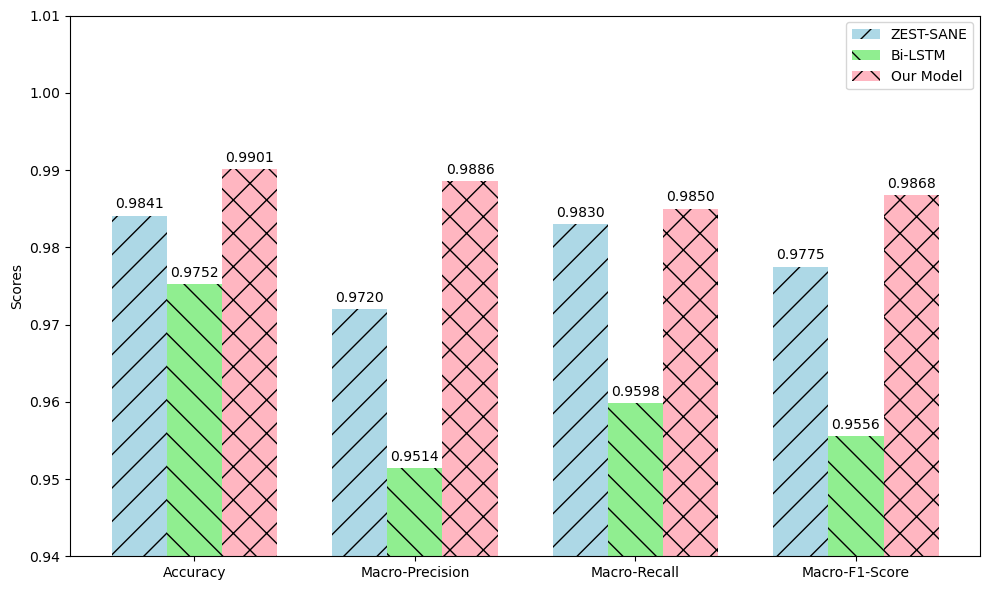

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = ["Accuracy", "Macro-Precision", "Macro-Recall", "Macro-F1-Score"]
zest_sane = [0.9841, 0.9720, 0.9830, 0.9775]
bi_lstm = [0.9752, 0.9514, 0.9598, 0.9556]
our_model = [0.9901, 0.9886, 0.9850, 0.9868]

# X axis
x = np.arange(len(metrics))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
width = 0.25

# Lighter colors
colors = ['#ADD8E6', '#90EE90', '#FFB6C1']

# Bars with different hatching styles and brighter colors
bars1 = ax.bar(x - width, zest_sane, width, label='ZEST-SANE', hatch='/', color=colors[0])
bars2 = ax.bar(x, bi_lstm, width, label='Bi-LSTM', hatch='\\', color=colors[1])
bars3 = ax.bar(x + width, our_model, width, label='Our Model', hatch='x', color=colors[2])

# Labels and titles
# ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
# ax.set_title('Performance Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Setting the y-axis limit to start from 0.90
ax.set_ylim([0.94, 1.01])

# Adding value labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

# Save the figure
plt.tight_layout()
plt.savefig('performance_metrics_comparison.png', dpi=300)
plt.show()


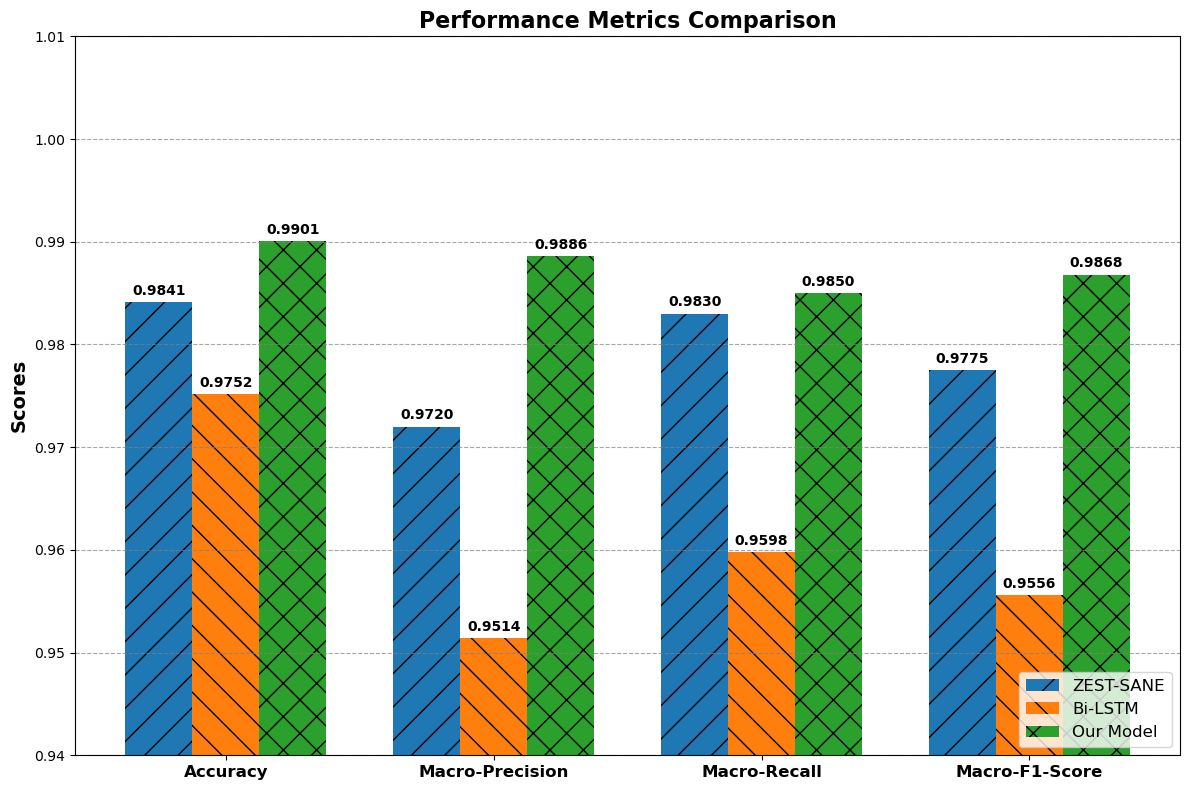

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = ["Accuracy", "Macro-Precision", "Macro-Recall", "Macro-F1-Score"]
zest_sane = [0.9841, 0.9720, 0.9830, 0.9775]
bi_lstm = [0.9752, 0.9514, 0.9598, 0.9556]
our_model = [0.9901, 0.9886, 0.9850, 0.9868]

# X axis
x = np.arange(len(metrics))

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Bar width
width = 0.25

# Colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Bars with different hatching styles and brighter colors
bars1 = ax.bar(x - width, zest_sane, width, label='ZEST-SANE', hatch='/', color=colors[0])
bars2 = ax.bar(x, bi_lstm, width, label='Bi-LSTM', hatch='\\', color=colors[1])
bars3 = ax.bar(x + width, our_model, width, label='Our Model', hatch='x', color=colors[2])

# Labels and titles
ax.set_ylabel('Scores', fontsize=14, weight='bold')
ax.set_title('Performance Metrics Comparison', fontsize=16, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12, weight='bold')
ax.legend(fontsize=12, loc='lower right')

# Setting the y-axis limit to start from 0.94
ax.set_ylim([0.94, 1.01])

# Adding grid for better readability
ax.yaxis.grid(True, linestyle='--', which='both', color='grey', alpha=0.7)
ax.xaxis.grid(False)

# Adding value labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10, weight='bold')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

# Save the figure
plt.tight_layout()
plt.savefig('performance_metrics_comparison.png', dpi=300)
plt.show()


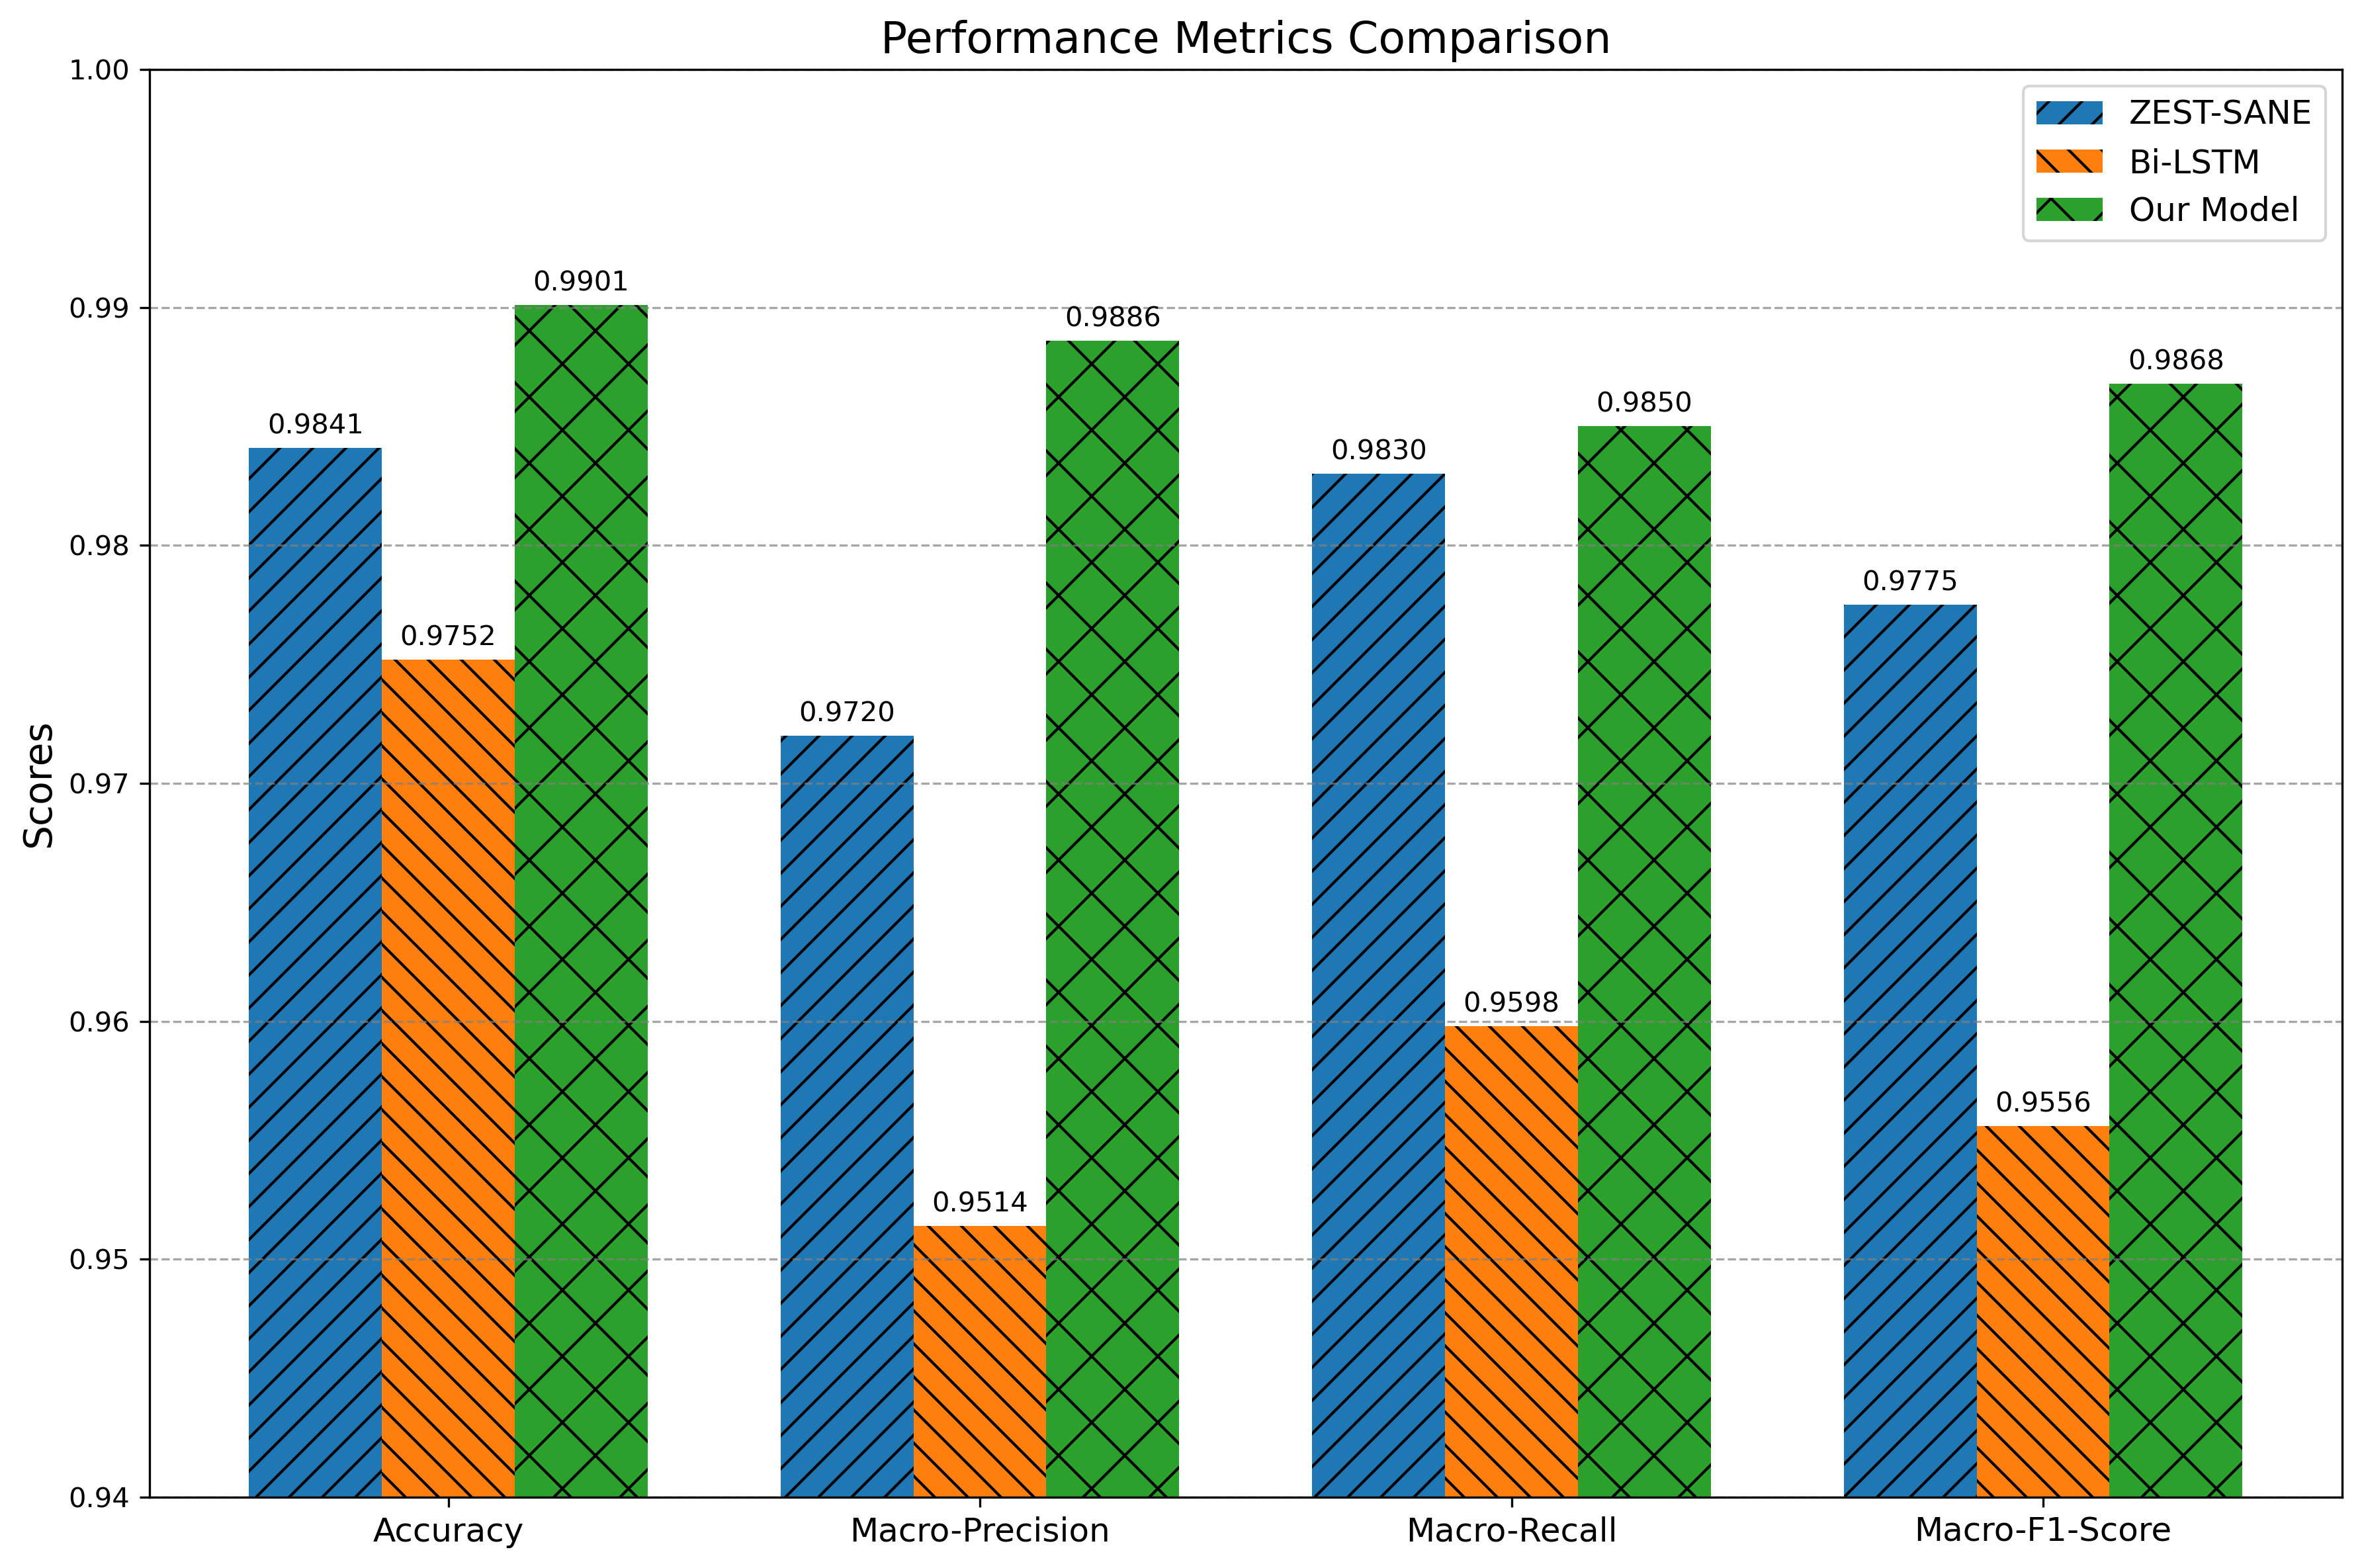

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = ["Accuracy", "Macro-Precision", "Macro-Recall", "Macro-F1-Score"]
zest_sane = [0.9841, 0.9720, 0.9830, 0.9775]
bi_lstm = [0.9752, 0.9514, 0.9598, 0.9556]
our_model = [0.9901, 0.9886, 0.9850, 0.9868]

# X axis
x = np.arange(len(metrics))

# Plotting
fig, ax = plt.subplots(figsize=(12, 8), dpi= 300)

# Bar width
width = 0.25

# Colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Bars with different hatching styles and brighter colors
bars1 = ax.bar(x - width, zest_sane, width, label='ZEST-SANE', hatch='//', color=colors[0])
bars2 = ax.bar(x, bi_lstm, width, label='Bi-LSTM', hatch='\\\\', color=colors[1])
bars3 = ax.bar(x + width, our_model, width, label='Our Model', hatch='x', color=colors[2])

# Labels and titles
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Performance Metrics Comparison', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12)
ax.legend(fontsize=12)

# Setting the y-axis limit to start from 0.94
ax.set_ylim([0.94, 1.0])

# Adding grid for better readability
ax.yaxis.grid(True, linestyle='--', which='both', color='grey', alpha=0.7)

# Adding value labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10)

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

# Save the figure
plt.tight_layout()
plt.savefig('performance_metrics_comparison.png', dpi=300)
plt.show()


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import precision_recall_fscore_support

# Define model parameters
CLASSES = 28
PATIENCE = 1
EPOCHS = 1
BATCH_SIZE = 128
DROPOUT = 0.2
LEARNING_RATE = 0.0001
REGULARIZATION = 0.001

# Assuming x_train and y_train are loaded somehow, check their types
if not isinstance(x_train, torch.Tensor):
    x_train = torch.tensor(x_train, dtype=torch.float32)
if not isinstance(y_train, torch.Tensor):
    y_train = torch.tensor(y_train, dtype=torch.float32)

# Ensure y_train is in the correct format
if y_train.dim() == 3 and y_train.size(1) == 1:  # Check if y_train has an unnecessary middle dimension
    y_train = y_train.squeeze(1)  # Remove the middle dimension, resulting in [128, 28]
if y_train.dim() == 2:  # If y_train is still two-dimensional (one-hot encoded)
    y_train = y_train.argmax(dim=1)  # Convert to class indices, resulting in [128]

y_train = y_train.to(torch.long)  # Ensure labels are of type torch.long

# Define the BiLSTM model
class BiLSTMModel(nn.Module):
    def __init__(self):
        super(BiLSTMModel, self).__init__()
        self.lstm1 = nn.LSTM(input_size=x_train.shape[2], hidden_size=64, batch_first=True, bidirectional=True)
        self.lstm2 = nn.LSTM(input_size=128, hidden_size=64, batch_first=True, bidirectional=True)
        self.fc1 = nn.Linear(128, 128)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(DROPOUT)
        self.fc2 = nn.Linear(128, CLASSES)

    def forward(self, x):
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x = self.fc1(x[:, -1, :])  # taking the last sequence output
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x  # Return raw logits

# Prepare data
dataset = TensorDataset(x_train, y_train)
loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

# Model, loss, and optimizer
model = BiLSTMModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Function to perform training and evaluation
def train_and_evaluate(model, loader):
    print("training")
    model.train()
    total_loss = 0  # Initialize total loss
    predictions = []
    true_labels = []
    for data, target in loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)  # target is now correctly formatted as class indices
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        # Store predictions and true labels for evaluation
        _, predicted = torch.max(output.data, 1)
        predictions.extend(predicted.tolist())
        true_labels.extend(target.tolist())
    
    # Calculate metrics
    precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels, predictions, average='weighted')
    print(f'Total Training Loss: {total_loss}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1_score}')

# Call the function to train and evaluate
train_and_evaluate(model, loader)


training


/home/binghui/anaconda3/envs/backdoor-attack/lib/python3.11/site-packages/torch/autograd/__init__.py:251: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at /opt/conda/conda-bld/pytorch_1702400430266/work/c10/cuda/CUDAFunctions.cpp:108.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Total Training Loss: 4650.9755467921495
Precision: 0.7554856259464682
Recall: 0.7695353623844877
F1 Score: 0.7535064838749379


/home/binghui/anaconda3/envs/backdoor-attack/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence



# Define the model using PyTorch
class BiLSTMModel(nn.Module):
    def __init__(self):
        super(BiLSTMModel, self).__init__()
        self.lstm1 = nn.LSTM(input_size=x_train.shape[2], hidden_size=64, batch_first=True, bidirectional=True)
        self.lstm2 = nn.LSTM(input_size=128, hidden_size=64, batch_first=True, bidirectional=True)
        self.fc1 = nn.Linear(128, 128)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(DROPOUT)
        self.fc2 = nn.Linear(128, CLASSES)
        self.softmax = nn.Softmax(dim=1)
        
        # Regularization
        self.l2_layers = [self.fc1, self.fc2]
        self.regularization = REGULARIZATION

    def forward(self, x):
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x = self.fc1(x[:, -1, :])  # only use the last sequence output
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x.reshape(1, -1)

    def l2_loss(self):
        l2 = 0
        for layer in self.l2_layers:
            for param in layer.parameters():
                l2 += param.pow(2).sum()
        return l2 * self.regularization

# Load data
# Assuming x_train and y_train are loaded and preprocessed as PyTorch tensors

# Set hyperparameters
CLASSES = 28
PATIENCE = 1
EPOCHS = 1
BATCH_SIZE = 128
DROPOUT = 0.2
LEARNING_RATE = 0.0001
REGULARIZATION = 0.001

# Model, optimizer, and loss function
model = BiLSTMModel()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss()

# Data loader
train_loader = DataLoader(list(zip(x_train, y_train)), batch_size=BATCH_SIZE, shuffle=True)

# Training function
def train(model, loader):
    model.train()
    for data, target in loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target) + model.l2_loss()  # Add L2 regularization loss
        loss.backward()
        optimizer.step()

# Set up early stopping and model checkpointing if needed, using PyTorch best practices


# plot training progress
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Stacked Bi-LSTM training')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()





In [ ]:
# define model

CLASSES=28
PATIENCE=1
EPOCHS=1
BATCH_SIZE = 128
DROPOUT = 0.2
LEARNING_RATE=0.0001
REGULARIZATION = 0.001

model = tf.keras.models.Sequential([
    Input(shape=x_train[0].shape, dtype = tf.float32),
    Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=l2(REGULARIZATION))),
    Bidirectional(LSTM(64, return_sequences=False, kernel_regularizer=l2(REGULARIZATION))),
    Dense(units=128, activation = 'relu', kernel_regularizer=l2(REGULARIZATION)),
    Dropout(DROPOUT),
    Dense(units=CLASSES, activation = 'softmax', kernel_regularizer=l2(REGULARIZATION)),
    Reshape([1, -1]),
])

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=PATIENCE,
                               mode='min')

checkpoint = ModelCheckpoint("{}/all_days_all_devices".format(MODELS), monitor='val_loss', verbose=0,
                                    save_best_only=True, mode='min')

model.compile(loss='categorical_crossentropy',
                   optimizer=Adam(learning_rate = LEARNING_RATE),
                   metrics=['accuracy'])


In [ ]:
# do training
history = model.fit(x_train, y_train, epochs=EPOCHS,
                    validation_data=(x_val,y_val),
                    callbacks=[early_stopping, checkpoint],
                    batch_size = BATCH_SIZE)

In [ ]:
# plot training progress
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Stacked Bi-LSTM training')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()